# HOUSE PRICE PREDICTION PROJECT
This project aims to predict house prices based on various features using machine learning techniques. The dataset used contains information about different houses, including their size, location, number of bedrooms, and other relevant attributes.

In [36]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("Data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Cleaning
Data cleaning will involve the following steps:
1. Filling missing values
2. Dropping duplicate values
3. Remove outliers

# Information about the data
data.info()

Handling missing values:
- Fill fields like `Alley, MasVnrType, BsmtQual, BmstCond, BmstExposure, BmstFinType1, BmstFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature` will be filled with **none**. The missing details are bits of information and not missing values.
- Fill the field `LotFrontage` with the median since every house touches the street with almost the same distance.
- Fill the field `Electrical` with the mode. 

In [37]:
# Replacing NA with "None" for categories
cat_cols_fill_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType', 'MiscFeature'
]
# Loop through and fill
for col in cat_cols_fill_none:
    data[col] = data[col].fillna("None")

# Replacing NA with 0 for numbers
# (If no masonry, area is 0. If no garage, year is 0)
num_cols_fill_zero = ['MasVnrArea', 'GarageYrBlt']
for col in num_cols_fill_zero:
    data[col] = data[col].fillna(0)

# Fills missing LotFrontage with the median of THAT neighborhood
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Fill with the most common value (mode)
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# Verify it's all clean
print(f"Number of missing values: {data.isnull().sum().sum()}") # Should print 0

Number of missing values: 0


In [38]:
# Check for duplicate values
dups = data.duplicated().sum().sum()
print("Number of duplicates: ",dups)

Number of duplicates:  0


Removing Outliers
- Outliers can exist when the houses are too big or too small, or the prices are too high or too low.

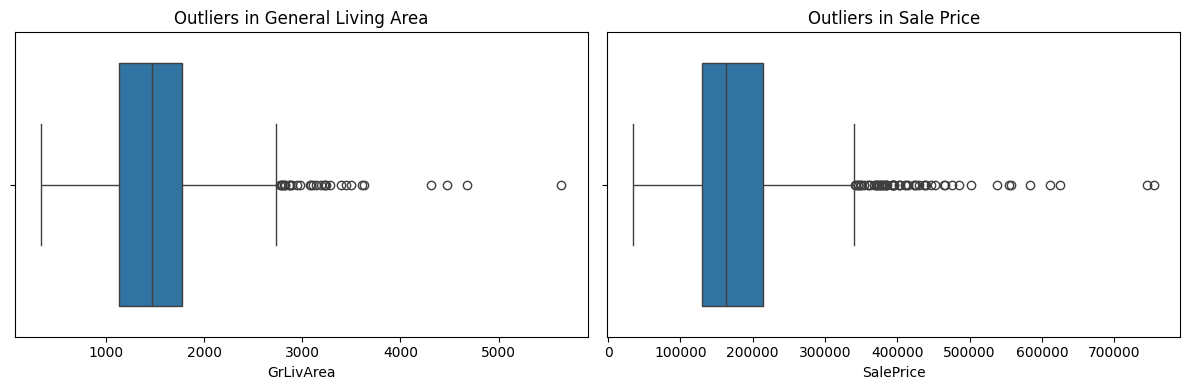

In [39]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 4))

# General Living Area
plt.subplot(1, 2, 1)
sns.boxplot(x=data['GrLivArea'])
plt.title('Outliers in General Living Area')

# Sale Price
plt.subplot(1, 2, 2)
sns.boxplot(x=data['SalePrice'])
plt.title('Outliers in Sale Price')

plt.tight_layout()
plt.show()

In [40]:
# Remove outliers
data = data.drop(data[(data['GrLivArea'] > 4000) & (data['SalePrice'] < 300000)].index)


Correcting Data types

In [ ]:
# Convert to string
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['MoSold'] = data['MoSold'].astype(str) 